In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

### Import Data

In [9]:
sport_data = pd.read_csv('Data/sportset.csv',sep=';',usecols=['height','weight','sport'])

The data contains a small sample of basketball (b) and football (f) players, with their height and weight.

In [15]:
sport_data.sample(5)

,height,weight,sport
43,195,88,f
40,184,83,f
81,198,97,b
144,190,90,b
76,192,86,b


In [11]:
sport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  145 non-null    int64 
 1   weight  145 non-null    int64 
 2   sport   145 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


# Scatterplot of height and weight by sport

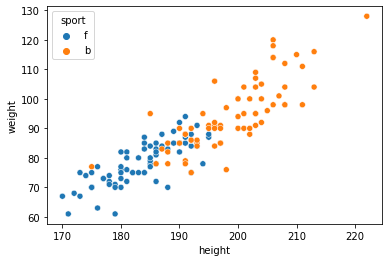

In [14]:
ax = sns.scatterplot(data=sport_data, x="height", y="weight",hue="sport")